In [1]:
import numpy as np
from matplotlib import pyplot as plt

# load data
x_test= np.load("data/x_test.npy", allow_pickle=True)
x_train= np.load("data/x_train.npy", allow_pickle=True)
y_test= np.load("data/y_test.npy", allow_pickle=True)
y_train= np.load("data/y_train.npy", allow_pickle=True)

# make sure they are the  correct shape
x_test = x_test.reshape((100, 1))
x_train = x_train.reshape((100, 1))
y_test = y_test.reshape((100, 1))
y_train = y_train.reshape((100, 1))

# poly func degree 6
x_test_new = np.zeros((100, 7))
x_train_new = np.zeros((100, 7))
for i in range(100 ):
    for j in range(7):
        value = x_test[i]**j
        x_test_new[i][j] = value

        value = x_train[i]**j
        x_train_new[i][j] = value

X = x_train_new
Y = y_train
X_test = x_test_new
Y_test = y_test

weight = np.zeros((1, x_test_new.shape[1]))
bias = 0.0
LR = 0.001
epochs = 4000000

In [3]:
# training loop
for i in range(epochs): 

    # make prediction
    Y_pred = np.matmul(X, weight.T) + bias

    # calcuate weight and bias update
    weight_update = (-2/(5200)) * np.dot( (Y - Y_pred).T, X) 
    bias_update = (-2/(5200)) * np.sum(Y - Y_pred) 

    # add updates to weights and bias
    weight = weight - LR * weight_update  # Update m
    bias = bias - LR * bias_update  # Update c

    # calacute loss 
    MSE1 = np.square(np.subtract(y_train, Y_pred)).mean()
    
    # testing data predictions and loss
    Y_pred2 = np.matmul(X_test, weight.T) + bias 
    MSE2 = np.square(np.subtract(Y_test, Y_pred2)).mean()

In [5]:
print("train loss:", MSE1, "test loss:", MSE2, "epoch:", i)

train loss: 3.1335111464826866e-21 test loss: 6.623508258384306e-21 epoch: 3999999


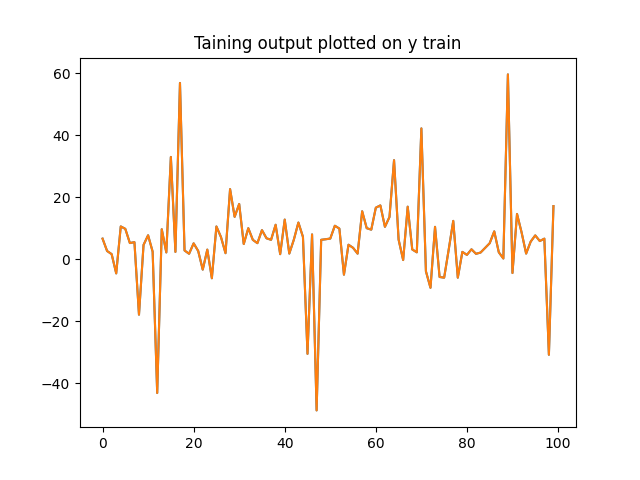

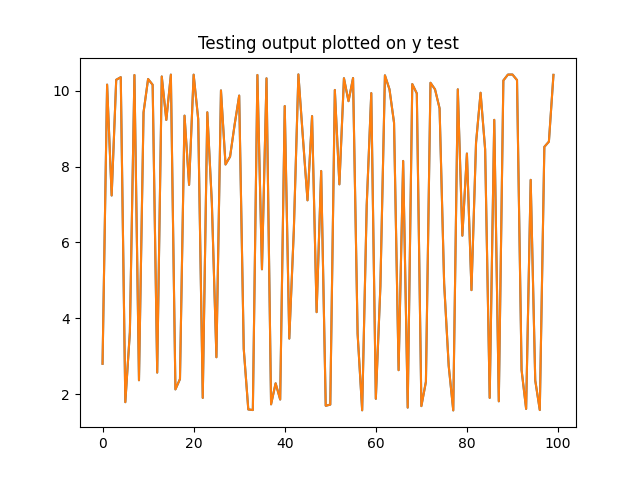

In [6]:
plt.plot(Y_pred)
plt.plot(y_train)
plt.title("Taining output plotted on y train")
plt.show()


plt.plot(Y_pred2)
plt.plot(y_test)
plt.title("Testing output plotted on y test")
plt.show()

I used gradient decent with a weight for every feature in the input. The bias function I used was a poly function with a degree of 6. Therefore I had 7 features in my input and had 7 weight values. I had a MSE of 3e-21